# Prediciendo con variables categóricas

En este notebook vamos a ver cómo podemos tratar las variables categóricas de un dataset, ya que pueden ser una fuente muy importante de información.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("data/transactions.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


Como podemos ver, en este dataset no solo tenemos variables numéricas, sino también categóricas. Estas variables pueden aportar información, por lo que, de no utilizarlas, estaríamos perdiendo información que podría mejorar nuestro modelo.

Como ya vimos en su día en el apartado de Feature Engineering, no podemos pasarle al algoritmo las variables categóricas como tal, exigen cierto tratamiento. Tenemoms que pasarlas a numéricas, pero ¿cómo?

Habíamos visto 2 formas:
  - Mapeo de los diferentes valores a número: se trata de mapear cada posible valor de la variable categórica a un valor numérico. Haciendo esto le estamos asignando cierto orden a uno sobre otro, que puede no ser así o no tan cuantificable. Puede servirnos como primera aproximación o para algún caso concreto, pero por lo general lo evitaremos en favor de get_dummies
  - Variables dummy: consiste en crear tantas variables nuevas como valores tenga la varaible en cuestión (menos 1 valor, como explicamos en su día, por el tema de poder expresar la combinación de 0's o no). De este mdo, las varaibles nuevas solo valdrán 1 o 0, y se corresponderán con el valor de la variable. De este modo se transfiere la información al modelo sin incurrir en el orden o prioridad del método anterior. Recordemos cómo se hacía:

In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

Vamos a ver qué hemos hecho:

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [8]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [9]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age',
 'Items',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

Vale, nos hemos creado las columnas pero... ¿dónde están?

Tranquilo, realmente lo que nos hemos creado son DataFrames que están aislados, no los hemos unido a nada. Las columnas aún no están en el DataFrame principal, así que las uniremos.

Empezamos por **Gender**:

In [10]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


Y pasamos a **City:**

In [11]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


Llegados a este punto, podremos crearnos nuestro modelo de regresión lineal con las varaibles que queramos. Para hacer este ejemplo, nos basaremos en las variables de "Monthly Income", "Transaction Time", "Record", y aquellas que acabamos de obtener a partir de "Gender" y "City". Sin embargo, para hacerlo bien ya sabemos lo que deberíamos hacer.

In [12]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]

In [13]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [20]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [21]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [22]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.1549461254958957),
 ('Gender_Female', -131.02501325554607),
 ('Gender_Male', 131.0250132555463),
 ('City_Tier 1', 76.76432601049517),
 ('City_Tier 2', 55.13897430923261),
 ('City_Tier 3', -131.90330031972786),
 ('Record', 772.2334457445645)]

In [23]:
lm.score(X,Y)

0.9179923586131016

Como puedes observar, el modelo devuelve un resultado bastante bueno, aunque probablemente estemos haceindo overfitting...


El modelo puede ser escrito como:


**Total_Spend** = -79.41713030137362 + **'Monthly Income'** * 0.14753898049205738 + **'Transaction Time'** * 0.15494612549589545+**'Gender_Female'** * -131.02501325554567 + **'Gender_Male'** * 131.0250132555456+**'City_Tier 1'** * 76.76432601049527 + **'City_Tier 2'** * 55.138974309232474 + **'City_Tier 3'** * -131.9033003197278 + **'Record'** * 772.2334457445648

  * Si es hombre y vive en CT1:
    - **Total_Spend** = 128.37220896466724 + **'Monthly Income'** * 0.14753898049205738 + **'Transaction Time'** * 0.15494612549589545+ **'Record'** * 772.2334457445648
  * Si es hombre y vive en CT2:
    - **Total_Spend** = 106.74685726340445 + **'Monthly Income'** * 0.14753898049205738 + **'Transaction Time'** * 0.15494612549589545 + **'Record'** * 772.2334457445648
  * Si es hombre y vive en CT3:
    - **Total_Spend** = -80.29541736555583 + **'Monthly Income'** * 0.14753898049205738 + **'Transaction Time'** * 0.15494612549589545+ **'Record'** * 772.2334457445648
  * Si es mujer y vive en CT1:
    - **Total_Spend** = -79.41713030137362 + **'Monthly Income'** * 0.14753898049205738 + **'Transaction Time'** * 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 + **'Record'** * 772.2334457445648
  * Si es mujer y vive en CT2:
    - **Total_Spend** = -79.41713030137362 + **'Monthly Income'** * 0.14753898049205738 + **'Transaction Time'** * 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  + **'Record'** * 772.2334457445648
  * Si es mujer y vive en CT3:
    - **Total_Spend** = -79.41713030137362 + **'Monthly Income'** * 0.14753898049205738 + **'Transaction Time'** * 0.15494612549589545 - 131.0250132555456-131.9033003197278 + **'Record'** * 772.2334457445648
    
Si queremos añadir las predicciones sobre un dataframe, podemos utilizar la fórmula o ir directamente a las predicciones del modelo:

In [24]:
df_new["prediction"] = lm.predict(X)

In [25]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


Y para completar el estudio, analizamos la varianza que no explicamos del modelo:

In [26]:
# Suma de los cuadrados de las diferencias:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
SSD

1517733985.340816

In [27]:
# Desviación típica de los residuos:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [28]:
sales_mean=np.mean(df_new["Total Spend"])
sales_mean

6163.176415976715

In [29]:
# Para obtener el % de varianza no explicada:
error = RSE/sales_mean
error*100

13.03113568029416

### EJERCICIO:

1. Prueba el modelo con un porcentaje de datos de test del 30%

2. Realiza un modelo solo con las variables numéricas y comprueba el resultado.

3. Repite lo mismo solo con las categóricas que te has creado.

4. Repite ahora añadiendo tanto las categóricas como las numéricas y realiza los pasos que creas oportunos para eliminarte las variables que no aporten, y calcula el resultado para compararlo con los otros 2

## Eliminar variables dummy redundantes

En su día dijimos que no aportaba nada crear una variable para todos y cada uno de los valores de la varaible categórica. Si eliminamos una de esas k variables obtendremos el mismo valor, veámoslo con un ejemplo:

Si traduces a un caso concreto lo que tenemos, sería algo con demasiados grados de libertad, algo como:
$10 = a + b*4 + c*2$

En este caso, existen varias combinaciones. En cambio, si utilizamos la reducción que vimos (que solamente era quitar una de las diferentes variables), eliminamos ese grado de libertad y lo dejamos más fijo, reduciendo posibles interacciones que no aportaran nada al modelo

In [142]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [30]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


Volvemos a hacer el join, pero habiendo eliminado una columna de cada conversión:

In [31]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,1,0


In [32]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [33]:
print(lm.intercept_)

-133.67781754642238


In [34]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Male', 262.05002651109584),
 ('City_Tier 2', -21.625351701262808),
 ('City_Tier 3', -208.6676263302231),
 ('Record', 772.2334457445636)]

In [36]:
lm.score(X,Y)

0.9179923586131016

Como puedes comprobar, la métrica sigeu siendo igual, pues lo único que hemos hecho es quitarle columnas que no paortaban información.,

#### Coeficientes con todas las variables en el modelo:
* 'Monthly Income': 0.14753898049205738,
* 'Transaction Time': 0.15494612549589545,
* 'Gender_Female': -131.02501325554567,
* 'Gender_Male': 131.0250132555456,
* 'City_Tier 1': 76.76432601049527,
* 'City_Tier 2': 55.138974309232474,
* 'City_Tier 3': -131.9033003197278,
* 'Record': 772.2334457445648
 
 
#### Coeficientes tras enmascarar las variables dummy pertinentes
* 'Monthly Income': 0.14753898049205744,
* 'Transaction Time': 0.15494612549589631,
* 'Gender_Male': 262.05002651109595,
* 'City_Tier 2': -21.62535170126296,
* 'City_Tier 3': -208.66762633022324,
* 'Record': 772.2334457445635


#### ¿Qué ha cambiado?

  - **Gender**:
    - Gender_Male: 131.02 -> 262.05 (+131.02)
    - Gender_Female: 131.02 -> 0 (-131.02)
    
  - **CT**:
    - CT1: 76.76 -> 0 (-76.76)
    - CT2: 55.13 -> -21.62 (-76.75)
    - CT3: -131.90 -> -208.66 (-76.759)
    

In [39]:
-208.66-(-131.90)

-76.75999999999999

### EJERCICIO:

1. Utiliza lo que has aprendido para realizar un modelo lineal para predecir ``'Fare'`` sobre el dataset del Titanic, donde la separación train-test sea de 0.3

2. ¿Realmente aportan información útil las variables categóricas de ese ejemplo? Responde a la pregunta entrenando el modelo sin categóricas, con todas y solo con categóricas, manteniendo el porcentaj de juego:

In [144]:
df = pd.read_csv("../../../data/Titanic.csv", sep='\t')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [156]:
df['SibSp'].value_counts()

0    121
2     17
1     15
5      2
3      1
Name: Parch, dtype: int64

In [145]:
df = df.dropna(subset=['Age'])
# df['Age'] = df['Age'].fillna(df['Age'].mean())

In [146]:
# 1. 

from sklearn.model_selection import train_test_split

features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']

X = df[features]
y = df['Fare']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape


(109, 5)

In [147]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [148]:
lm.score(X_test, y_test)

0.2959287585882123

In [174]:
# 2.
df = pd.read_csv("../../../data/Titanic.csv", sep='\t')
df = df.dropna(subset=['Age'])

cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in cat_cols:
    df_aux = pd.get_dummies(df[col], prefix=col).iloc[:,1:]
    df = df.join(df_aux)
    df = df.drop(col, axis=1)
    
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [176]:
df

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_1,Parch_2,Parch_3,Parch_5,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,51.0,12.5250,1,0,1,0,0,0,0,0,0,0,0,0,0,1
151,1,22.0,66.6000,0,0,0,1,0,0,0,0,0,0,0,0,0,1
152,0,55.5,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,1
153,0,40.5,14.5000,0,1,1,0,0,0,0,0,0,1,0,0,0,1


In [182]:
features2 = [col for col in df.columns if col not in ['Fare', 'Survived']]

X = df[features2]
y = df['Fare']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape

(88, 15)

In [183]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [184]:
lm.score(X_train, y_train)

0.5697454099013695

In [185]:
lm.score(X_test, y_test)

0.5499010356667164

In [193]:
## 
df = pd.read_csv("../../../data/Titanic.csv", sep='\t')

df.drop('Cabin', inplace=True, axis=1)
df['Age'] = df['Age'].fillna(np.mean(df['Age']))
df.dropna(inplace=True)
df.info()

#Separate Numerical Variables
num_df = df[['Age', 'Fare']]
df['SibSp'] = df['SibSp'].apply(lambda x: 0 if x==0 else 1)
df['Parch'] = df['Parch'].apply(lambda x: 0 if x==0 else 1)

#Encode/Dummify categorical variables
gender_dummy = pd.get_dummies(df['Sex'], prefix='gender_')
embarked_dummy = pd.get_dummies(df['Embarked'], prefix='Embarked_')
pclass_dummy = pd.get_dummies(df['Pclass'], prefix='Pclass_')
sibsp_dummy = pd.get_dummies(df['SibSp'], prefix='SibSp_')
parch_dummy = pd.get_dummies(df['Parch'], prefix='Parch_')

new_df = num_df.join(gender_dummy)
# new_df = new_df.join(embarked_dummy)
new_df = new_df.join(pclass_dummy)
new_df = new_df.join(sibsp_dummy)
new_df = new_df.join(parch_dummy)
new_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  155 non-null    int64  
 1   Survived     155 non-null    int64  
 2   Pclass       155 non-null    int64  
 3   Name         155 non-null    object 
 4   Sex          155 non-null    object 
 5   Age          155 non-null    float64
 6   SibSp        155 non-null    int64  
 7   Parch        155 non-null    int64  
 8   Ticket       155 non-null    object 
 9   Fare         155 non-null    float64
 10  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 14.5+ KB


,Age,Fare,gender__female,gender__male,Pclass__1,Pclass__2,Pclass__3,SibSp__0,SibSp__1,Parch__0,Parch__1
0,22.000000,7.2500,0,1,0,0,1,0,1,1,0
1,38.000000,71.2833,1,0,1,0,0,0,1,1,0
2,26.000000,7.9250,1,0,0,0,1,1,0,1,0
3,35.000000,53.1000,1,0,1,0,0,0,1,1,0
4,35.000000,8.0500,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
151,22.000000,66.6000,1,0,1,0,0,0,1,1,0
152,55.500000,8.0500,0,1,0,0,1,1,0,1,0
153,40.500000,14.5000,0,1,0,0,1,1,0,0,1
154,28.141508,7.3125,0,1,0,0,1,1,0,1,0


In [230]:
X = new_df.drop('Fare', axis=1).copy()
y = new_df['Fare']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
fare_model = LinearRegression()
fare_model.fit(X_train, y_train)
fare_model.score(X_test, y_test)

0.52955356071421

In [231]:
prediction = fare_model.predict(X_test)

result_df = pd.DataFrame({'Actual': y_test, 'Prediction': prediction})
result_df

,Actual,Prediction
82,7.7875,1.177645
143,6.7500,8.146032
31,146.5208,80.388390
29,7.8958,5.590514
119,31.2750,39.082950
60,7.2292,7.307379
94,7.2500,-3.036008
148,26.0000,31.916660
154,7.3125,5.590514
69,8.6625,19.964151


In [14]:
##
import pandas as pd

df = pd.read_csv("../../../data/Titanic.csv", sep='\t')

separado = df["Ticket"].str.split(" ", n=1, expand=True)
df["Ticket"].apply(lambda x: x.split(" ")[-1])

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
151     113776
152      11206
153        851
154     265302
155      17597
Name: Ticket, Length: 156, dtype: object

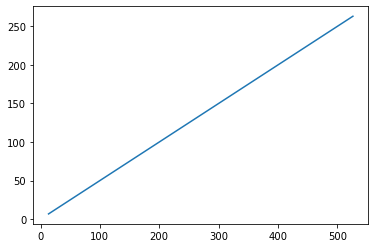

In [20]:
import matplotlib.pyplot as plt

df['Trampas'] = df['Fare'].apply(lambda x: x*2)

plt.plot(df['Trampas'].sort_values().values,df['Fare'].sort_values().values);